In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [3]:
options = {'model': 'cfg/yolo.cfg', 
           'load': 'bin/yolov2.weights', 
           'threshold': 0.3}


tfnet = TFNet(options)

/Users/Mohammed/pythonFiles/100DaysofMLCode/100DaysofMLCode/darkflow-master/darkflow/dark/darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 1.656484842300415s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnor

In [10]:
img = cv2.imread('cv.png', cv2.IMREAD_COLOR)
result = tfnet.return_predict(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img.shape # Height, width, number of channels

(655, 1160, 3)

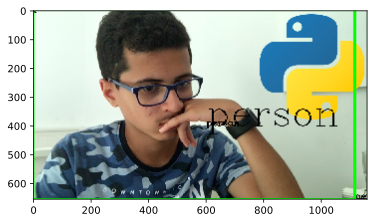

In [16]:
tl = (result[0]['topleft']['x'],
      result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'],
      result[0]['bottomright']['y'])
label = result[0]['label']

img = cv2.rectangle(img, tl, br, (0,255,0), 7)
img = cv2.putText(img, label, (600,400), cv2.FONT_HERSHEY_COMPLEX, 4, (0,0,0), 2) # 1 is font size
plt.imshow(img)
plt.show()